In [1]:
import sys
sys.path.append('..')
from utils import *
sys.path.append('../attacks/')
from fgsm import *
from pgd import *
sys.path.append('../models/')
import torch
from torchvision import transforms
import numpy as np
from torchvision import datasets
from torch import norm
from tqdm import tqdm
import cv2

In [2]:
T = transforms.ToTensor()

In [3]:
cifar_testset = datasets.CIFAR10(root='/home/hancy/dataset/',train=False,transform=T,download=True)

Files already downloaded and verified


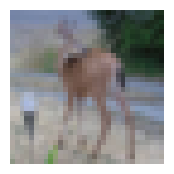

In [5]:
img = cifar_testset[100][0]
pltshow(img)

In [6]:
wm = cv2.imread('../../adv_wm/img/logo.jpg')
wm = cv2.cvtColor(wm,cv2.COLOR_BGR2RGB)
wm = cv2.resize(wm,dsize=(img.shape[2],img.shape[1]),fx=1,fy=1,interpolation=cv2.INTER_LINEAR)

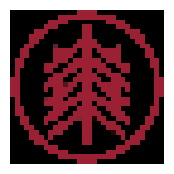

In [7]:
wm = T(wm)
wm = wm.cuda()
pltshow(wm)

In [8]:
block_size = 4
alpha = 0.05
beta = 1/255
l1 = 0.001
l2 = 0.001
s_a = 0.00005
s_b = 0.0001
N = 10
beta_max = 3/255
model = torch.load('../models/pts/cifar_vgg_19.pt')

In [9]:
model = model.cuda()
model = model.eval()

In [10]:
wmed_img = embed_wm(img,wm,block_size=block_size,alpha=alpha)

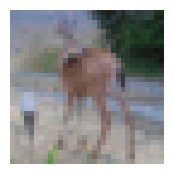

In [11]:
pltshow(wmed_img)

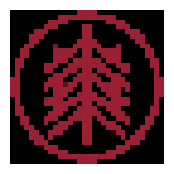

In [12]:
wm_extract = extract_wm(img,wmed_img,alpha=alpha,block_size=block_size)
pltshow(wm_extract)

In [13]:
label = torch.tensor([cifar_testset[100][1]]).cuda()

In [14]:
wmed_img_fgsm = fgsm_direct(wmed_img,label,wm,model,alpha,beta,block_size)

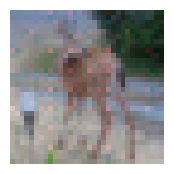

In [15]:
pltshow(wmed_img_fgsm)

In [16]:
wm_extract_direct = extract_wm(img,wmed_img_fgsm,alpha=alpha,block_size=block_size)

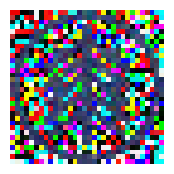

In [17]:
pltshow(wm_extract_direct)

In [18]:
wmed_img_opti, wm_extract_opti = fgsm_wm_opti(img,label,wm,model,alpha,beta,block_size,N,l1,l2,s_a,s_b,beta_max)

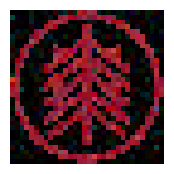

In [19]:
pltshow(wm_extract_opti)

In [26]:
res = model(wmed_img_opti.unsqueeze(0))

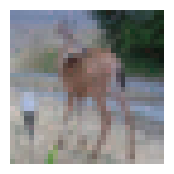

In [27]:
pltshow(wmed_img_opti)

In [21]:
res.argmax()

tensor(7, device='cuda:0')

In [22]:
from torch import norm

In [23]:
norm(wm_extract-wm_extract_direct)

tensor(13.7201, device='cuda:0', dtype=torch.float64)

In [25]:
norm(wm_extract-wm_extract_opti)

tensor(3.6121, device='cuda:0', dtype=torch.float64)